In [3]:
import os.path
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import itertools
import seaborn as sns

from scipy import interpolate
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1000, 2)


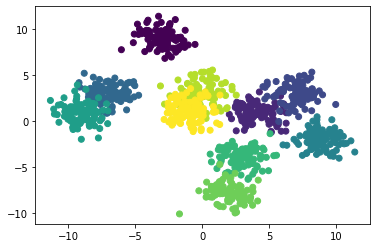

In [4]:
load=True
num_cells = 1000
num_dims_reduced = 2
num_branches = 2
K = 10 # cluster labels
if num_branches == 2:
    filename = 'fakedata-2branch.npy'
    start_node = 5
else:
    filename = 'fakedata-1branch.npy'
    start_node = 4

if load:
    data = np.load(filename, allow_pickle=True).item()
    cluster_labels = data['cluster_labels']
    data = data['data'].numpy()
else:
    cluster_labels = np.zeros([num_cells], dtype=int)
    data = list()
    for k in range(K):
        cells = num_cells // K
        offset = torch.randint(20, torch.Size([2])) - 10
        print(offset.shape)

        data.append(offset + torch.randn(torch.Size([num_cells//K, num_dims_reduced])))
        cluster_labels[k*cells:(k+1)*cells] = k
    data = torch.cat(data)
    np.save(filename, dict(data=data, cluster_labels=cluster_labels))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)

cluster_labels_onehot = np.zeros((cluster_labels.shape[0], cluster_labels.max()+1))
cluster_labels_onehot[np.arange(cluster_labels.shape[0]), cluster_labels] = 1

print(data.shape)

Lineages: [Lineage[5, 3, 9, 8, 0], Lineage[5, 3, 9, 8, 1, 2, 4], Lineage[5, 3, 9, 8, 1, 6, 7]]


  0%|          | 0/3 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @1 with lineages: [1, 2] [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]
Averaging branch @8 with lineages: [0, 1, 2] [<pcurve.PrincipalCurve object at 0x0000029B14E138C8>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @8 with curves: [<pcurve.PrincipalCurve object at 0x0000029B14E138C8>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @1 with curves: [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]


 33%|███▎      | 1/3 [00:03<00:06,  3.08s/it]

Reversing from leaf to root
Averaging branch @1 with lineages: [1, 2] [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]
Averaging branch @8 with lineages: [0, 1, 2] [<pcurve.PrincipalCurve object at 0x0000029B1287EC48>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @8 with curves: [<pcurve.PrincipalCurve object at 0x0000029B1287EC48>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @1 with curves: [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]


 67%|██████▋   | 2/3 [00:06<00:03,  3.09s/it]

Reversing from leaf to root
Averaging branch @1 with lineages: [1, 2] [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]
Averaging branch @8 with lineages: [0, 1, 2] [<pcurve.PrincipalCurve object at 0x0000029B11791CC8>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @8 with curves: [<pcurve.PrincipalCurve object at 0x0000029B11791CC8>, <pcurve.PrincipalCurve object at 0x0000029B14C03248>]
Shrinking branch @1 with curves: [<pcurve.PrincipalCurve object at 0x0000029B13E2C848>, <pcurve.PrincipalCurve object at 0x0000029B14B85748>]


100%|██████████| 3/3 [00:09<00:00,  3.10s/it]


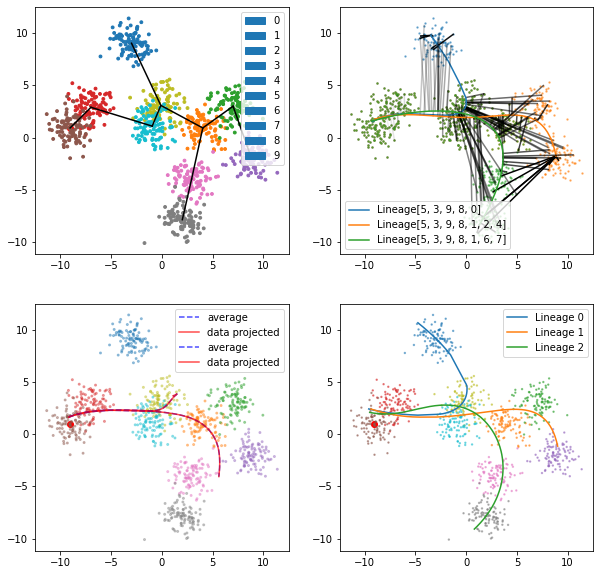

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

from slingshot import Slingshot

slingshot = Slingshot(data, cluster_labels_onehot, start_node=start_node, debug_level='verbose')

slingshot.fit(num_epochs=3, debug_axes=axes)

In [9]:
print(slingshot.prev_curves[0].pseudotimes_interp)

[2.05225016e+01 1.92656397e+01 1.91374287e+01 1.85184032e+01
 1.76618065e+01 2.06385983e+01 1.87137715e+01 2.00065090e+01
 1.70339286e+01 1.87212942e+01 1.71247382e+01 2.01372363e+01
 1.83681521e+01 1.86276079e+01 1.97494196e+01 2.01704956e+01
 1.83606437e+01 1.93674216e+01 1.71564678e+01 1.94851442e+01
 2.03460539e+01 1.66551788e+01 1.74452699e+01 1.81125515e+01
 2.00546509e+01 1.82773146e+01 1.91639111e+01 1.69128492e+01
 1.94033246e+01 1.85571508e+01 1.91606138e+01 1.80235014e+01
 1.90196666e+01 1.80296292e+01 1.99539023e+01 2.02612929e+01
 1.92130336e+01 1.90308668e+01 1.70256324e+01 1.85594704e+01
 1.84732928e+01 2.03924638e+01 1.92611207e+01 1.88112196e+01
 1.69742581e+01 1.88893389e+01 1.87068254e+01 1.87601707e+01
 1.95007298e+01 2.06385983e+01 1.88869231e+01 1.85878230e+01
 1.93850367e+01 2.02581385e+01 1.93835418e+01 1.80079013e+01
 1.91927242e+01 1.80794867e+01 1.79344378e+01 1.89893183e+01
 1.79880712e+01 1.78924733e+01 1.90389563e+01 1.81640774e+01
 1.74640214e+01 1.718070

In [ ]:
tttttt


In [ ]:
def scipy_interpolate():
    x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
    y = np.sin(x)

    tck = interpolate.splrep(x, y, s=0.5)
    xnew = np.arange(0, 2*np.pi, np.pi/50)

    ynew = interpolate.splev(xnew, tck, der=0)

    plt.plot(xnew, ynew)
    plt.plot(xnew, np.sin(xnew))


